In [1]:
# import neccesary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import os


In [5]:
#Download cancer dataset directly from kaggle
# set the API keys and username

os.environ['KAGGLE_USERNAME'] = "usefulness121"
os.environ['KAGGLE_KEY'] = "4f61b7e9ebe449d2e963fefbfa255b0f"

!kaggle datasets download -d uciml/breast-cancer-wisconsin-data



  0%|          | 0.00/48.6k [00:00<?, ?B/s]
100%|##########| 48.6k/48.6k [00:00<00:00, 216kB/s]
100%|##########| 48.6k/48.6k [00:00<00:00, 215kB/s]


In [7]:
# Unzip dataset
!unzip breast-cancer-wisconsin-data.zip


Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [8]:
# read in the dataset as a dataframe
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
# check the dimension of the dataset
df.shape

(569, 33)

In [11]:
# check for missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# drop the column with the null values
df.dropna(axis=1, inplace=True)


In [13]:
# check the dimension again
df.shape

(569, 32)

In [14]:
# count the number of values in the diagnosis column
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [18]:
### Encoding the data column to convert the text label to numeric label
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] =labelencoder.fit_transform(df.iloc[:,1].values)


In [21]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [39]:
#Splitting the dataset into independent and dependent datasets

x = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [40]:
#Splitting datasets into training(75%) and testing (25%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(426, 30)
(143, 30)
(426,)
(143,)


In [42]:
# Standard Scaler Nomarlization 

sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [47]:
# convert y_train to interger to work well with x_train
y_train = y_train.astype(int)


In [48]:
# build a logistic classification classifier

classifier = LogisticRegression()
classifier.fit(x_train, y_train)



LogisticRegression()

In [49]:
#Perform a classification prediction based on the test data
predictions = classifier.predict(x_test)

In [55]:
# convert y_test from an object to an int data types 
y_test = y_test.astype(int)

# calculate the confusion matrix
cm = confusion_matrix(y_test,predictions)
print(cm)


[[95  2]
 [ 2 44]]


<Axes: >

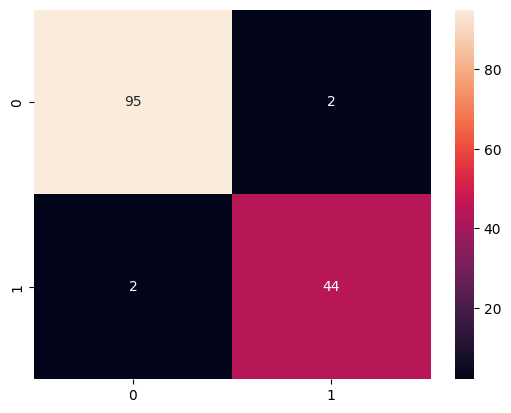

In [56]:
# visualise the result

sns.heatmap(cm, annot=True)


In [58]:
#Calculate accuracy score for model
print(accuracy_score(y_test,predictions))

0.972027972027972


In [59]:
# compare result for both cases manually
print(y_test)

[1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1]


In [60]:
print(predictions)

[1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1]


In [63]:
# calculate model precision
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
print(precision_score(y_test, predictions))

0.9565217391304348


In [66]:
# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predictions)

print(precision)
print(recall)
print(thresholds)

[0.32167832 0.95652174 1.        ]
[1.         0.95652174 0.        ]
[0 1]


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


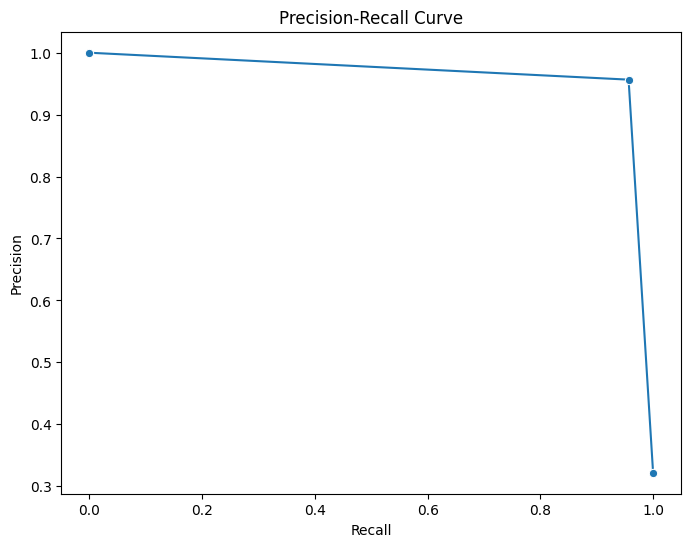

In [69]:
# Plot precision-recall curve 

plt.figure(figsize=(8, 6))

sns.lineplot(x=recall, y=precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()